Notes:
We still need to determine the model for the repeated measured non-parametic test and adjust all assumption checking models to it
We need to make functions out of the different if/else loops

In [167]:
import sys
sys.path.append('/Users/Sofie/Documents/DCL/DCLmeetsRETUNE/image_analysis_pipeline/')

In [5]:
from findmycells.main import Project
from findmycells.quantifications import ReconstructCellsIn3DFrom2DInstanceLabels, CountCellsInWholeStructure
#from findmycells.inspection import InspectUsingMultiMatchIDX

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy
#from statsmodels import qqplot
import statsmodels.formula.api as smf
#from statsmodels.formula.api import MixedLM
from scipy.stats import norm, levene, bartlett
import statistics
#import statsmodels.api as sm

## Load and Prepare the Data

In [7]:
df = pd.read_csv('/mnt/c/Users/dsege/TEMP/counted_cells.csv')

In [8]:
df.tail(10)

,Unnamed: 0,file_id,group_id,subject_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
51,51,54,wt,#7_wt_old,8767360.0,9.0,86.0,130.837103,14.537456
52,52,55,wt,#7_wt_old,5892928.0,8.0,12.0,27.161354,3.395169
53,53,56,wt,#7_wt_old,4314688.0,9.0,70.0,216.396361,24.044040
54,54,57,wt,#9_wt_old,5140832.0,8.0,46.0,119.350909,14.918864
55,55,58,wt,#9_wt_old,4477600.0,8.0,71.0,211.501944,26.437743
56,56,59,wt,#9_wt_old,7410528.0,9.0,184.0,331.184482,36.798276
57,57,60,wt,#9_wt_old,7109728.0,10.0,152.0,285.162170,28.516217
58,58,61,wt,#9_wt_old,5770116.0,9.0,123.0,284.329471,31.592163
59,59,62,wt,#9_wt_old,5751712.0,9.0,86.0,199.435575,22.159508
60,60,63,wt,#9_wt_old,4715968.0,10.0,96.0,271.519917,27.151992


In [9]:
df.describe()

,Unnamed: 0,file_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
count,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000
mean,30.000000,31.622951,5.329419e+06,8.442623,63.295082,159.958337,18.747975
std,17.752934,19.069316,1.715786e+06,0.940294,36.455152,84.831816,9.527849
min,0.000000,0.000000,4.195400e+05,6.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,4.477600e+06,8.000000,41.000000,92.881431,11.610179
50%,30.000000,33.000000,5.251488e+06,8.000000,65.000000,169.548150,19.004340
75%,45.000000,48.000000,6.312800e+06,9.000000,83.000000,216.396361,26.251630
max,60.000000,63.000000,9.264510e+06,11.000000,184.000000,331.184482,39.079717


## Let's check normality

In [111]:
stat_results = dict()

In [119]:
from typing import Dict, List, Tuple

def check_normality(data: pd.DataFrame, dv_col: str, results: Dict) -> Dict:
    stat, p = shapiro(data[dv_col])
    if p >= 0.05:
        normal = True
    else:
        normal = False
    results['normal_distribution'] = {'test_statistic': stat, 'p-value': p, 'bool': normal}
    return results

In [120]:
from statsmodels.regression.mixed_linear_model import MixedLMResultsWrapper

def create_a_mixed_linear_model(data: pd.DataFrame, dv_col: str, fixed_effects_col: str, random_effects_col: str) -> MixedLMResultsWrapper:
    return smf.mixedlm(f"{dv_col} ~ {fixed_effects_col}", data, groups = random_effects_col).fit()

In [121]:
stat_results = check_normality(data=df, dv_col='cc_normalized_per_volume', results = stat_results)
if stat_results['normal_distribution']['bool']:
    model = create_a_mixed_linear_model(data = df, dv_col = 'cc_normalized_per_volume', fixed_effects_col = 'group_id', random_effects_col = 'subject_id')
else:
    # exit to get user feedback

In [ ]:
# Example how the bigger picture could look like
def compute_statistics(data: pd.DataFrame, dv_col: str, distribution_type: Optional[str]=None) -> Dict:
    stat_results = check_normality(data=df, dv_col='cc_normalized_per_volume', results = stat_results)
    if stat_results['normal_distribution']['bool']:
        model = create_a_mixed_linear_model(data = df, dv_col = 'cc_normalized_per_volume', fixed_effects_col = 'group_id', random_effects_col = 'subject_id')
    else:
        # exit if distribution_type == None:
            # exit
        # if defined: adjusted_model = create_adjusted_model(data, distribution_type

In [117]:
model

In [105]:
stat, p = shapiro(df['cc_normalized_per_volume'])
if p >= 0.05:
    print("Normality can be assumed. The p-value for the shapiro test was {}".format(p))
    model = smf.mixedlm("cc_normalized_per_volume ~ group_id", df, groups = "subject_id").fit()
else:
    print("WARNING: Normality is violated. Run non-parametric model. The p-value for the shapiro test was {}".format(p))
    #insert model here

Normality can be assumed. The p-value for the shapiro test was 0.43962615728378296


In [108]:
shapiro(df['cc_normalized_per_volume'])

ShapiroResult(statistic=0.9805209636688232, pvalue=0.43962615728378296)

In [11]:
#Check it's running before putting it into the model
model = smf.mixedlm("cc_normalized_per_volume ~ group_id", df, groups = "subject_id").fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:            MixedLM Dependent Variable: cc_normalized_per_volume
No. Observations: 61      Method:             REML                    
No. Groups:       10      Scale:              45.9057                 
Min. group size:  4       Log-Likelihood:     -208.4239               
Max. group size:  7       Converged:          Yes                     
Mean group size:  6.1                                                 
------------------------------------------------------------------------
                    Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept           18.494      3.538    5.227   0.000   11.559   25.429
group_id[T.wt]      -0.083      4.994   -0.017   0.987   -9.871    9.705
subject_id Var      54.667      4.923                                   
======================================================================

"""

### Non-parametric model for repeated measures?

In [29]:
#subset for Friedman model
df_friedman = df[["group_id", "subject_id", "cc_normalized_per_volume"]]
df_friedman.head(20)

,group_id,subject_id,cc_normalized_per_volume
0,tg,#10_tg_old,0.000000
1,tg,#10_tg_old,18.729920
2,tg,#10_tg_old,8.306840
3,tg,#10_tg_old,4.944721
4,tg,#10_tg_old,24.454311
5,tg,#10_tg_old,26.251630
6,tg,#11_tg_old,26.598050
7,tg,#11_tg_old,39.079717
8,tg,#11_tg_old,21.447865
9,tg,#11_tg_old,28.997950


In [ ]:
#Problem: I can't figure out if this works when we're only dealing with 2 levels or what the data format should be
#pg.friedman(df_friedman)

### Plotting Normality

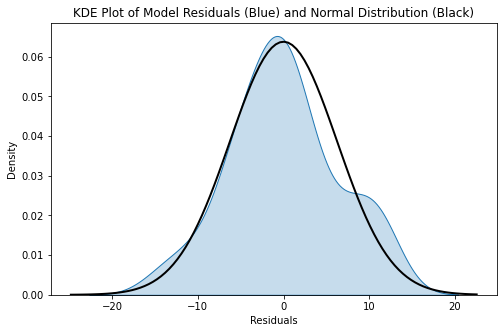

In [50]:
#2 types of normality plots
#kde_kws = {"shade" : True, "lw": 1}
fig = plt.figure(figsize=(8,5), facecolor='white')
ax = fig.add_subplot()
sns.kdeplot(model.resid, fill=True, ax=ax)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(model.resid)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

#sns.kdeplot(normal_dist, color = 'k', ax=ax)

plt.title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
plt.xlabel("Residuals")
plt.show()

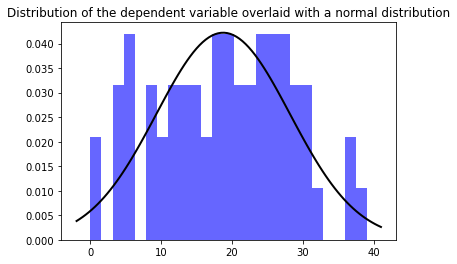

In [13]:
#h = sns.displot(df, x="cc_normalized_per_volume", kind="kde")
#df_normal = np.random.normal(statistics.mean(df['cc_normalized_per_volume']),statistics.stdev(df['cc_normalized_per_volume']),61)
df_hist = df['cc_normalized_per_volume']
mu, std = norm.fit(df_hist)
plt.hist(df_hist, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Distribution of the dependent variable overlaid with a normal distribution".format(mu, std)
plt.title(title)
  
plt.show()

#Problem: the histogram doesn't seem to represent our data - figure out why when you have time
#def map_pdf(x, **kwargs):
#    mu, std = scipy.stats.norm.fit(x)
#    x0, x1 = p1.axes[0][0].get_xlim()  # axes for p1 is required to determine x_pdf
#    x_pdf = np.linspace(x0, x1, 100)
#    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
#    plt.plot(x_pdf, y_pdf, c='r')


#p1 = sns.displot(data=df_hist, x=df_hist['cc_normalized_per_volume'], kind='hist', bins=40, stat='density')
#p1.map(map_pdf, 'cc_normalized_per_volume')

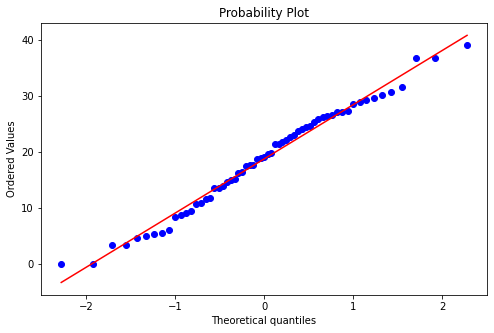

In [51]:
fig = plt.figure(figsize=(8,5), facecolor='white')
ax = fig.add_subplot()
ax = scipy.stats.probplot(df['cc_normalized_per_volume'], dist="norm", plot=plt)
plt.show()

## Checking homoscedasticity
#### Preparing data

In [52]:
#Make dataframes compatible for Levene's and Bartlett's test
df_tg = df.loc[df['group_id'] == 'tg']
df_tg = df_tg.rename(columns={"cc_normalized_per_volume": "tg"})

df_wt = df.loc[df['group_id'] == 'wt']
df_wt = df_wt.rename(columns={"cc_normalized_per_volume": "wt"})

### Homoscedasticity loop based on normality

In [53]:
stat, p_norm = shapiro(df['cc_normalized_per_volume'])
if p_norm >= 0.05:
    print("Normality can be assumed, running Bartlett's test")
    stat, p_homo = levene(df_wt['wt'], df_tg['tg'])
    if p_homo >= 0.05:
        print ("Homoscedasticity is not violated. P-value for Bartlett's test was {}".format(p_homo))
    elif p_homo < 0.05:
        print("Homoscedasticity is violated. P-value for Bartlett's test was {}. Consider running data transformations".format(p_homo))
else:
    print("WARNING: Normality is violated, running Levene's test")
    stat, p_homo = levene(df_wt['wt'], df_tg['tg'])
    if p_homo >= 0.05:
        print ("Homoscedasticity is not violated. P-value for Levene's test was {}".format(p_homo))
    elif p_homo < 0.05:
        print("Homoscedasticity is violated. P-value for Levene's test was {}".format(p_homo))

Normality can be assumed, running Bartlett's test
Homoscedasticity is not violated. P-value for Bartlett's test was 0.14548546852666838


#### Visualizing Homoscedasticity
Generally, if the ratio of the largest variance to the smallest variance is 1.5 or below, the data is homoscedastic.
Simply put, homoscedasticity means “having the same scatter.” For it to exist in a set of data, the points must be about the same distance from the line.
Source: https://www.statisticshowto.com/homoscedasticity/
Code source: https://www.pythonfordatascience.org/mixed-effects-regression-python/

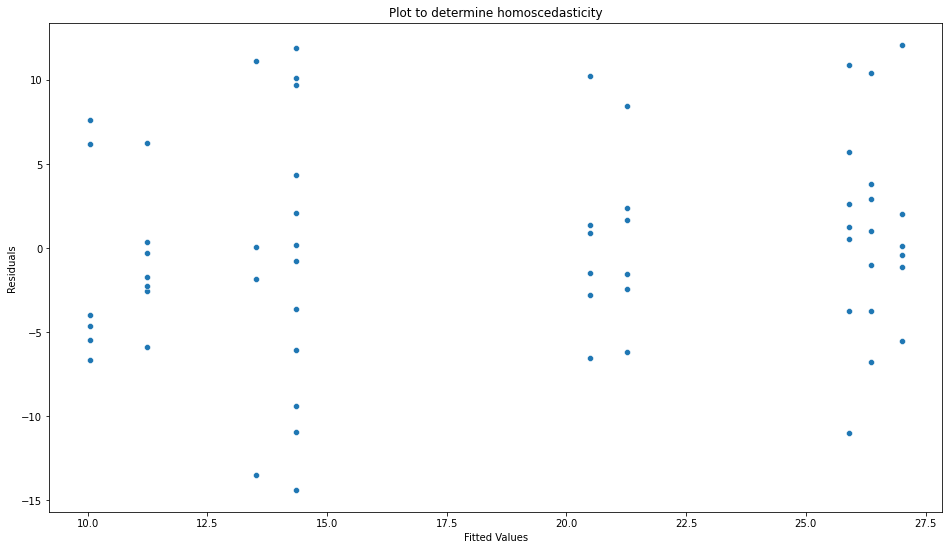

In [55]:
fig = plt.figure(figsize = (16, 9))
ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)
ax.set_title("Plot to determine homoscedasticity")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
plt.show()

<AxesSubplot:xlabel='subject_id', ylabel='cc_normalized_per_volume'>

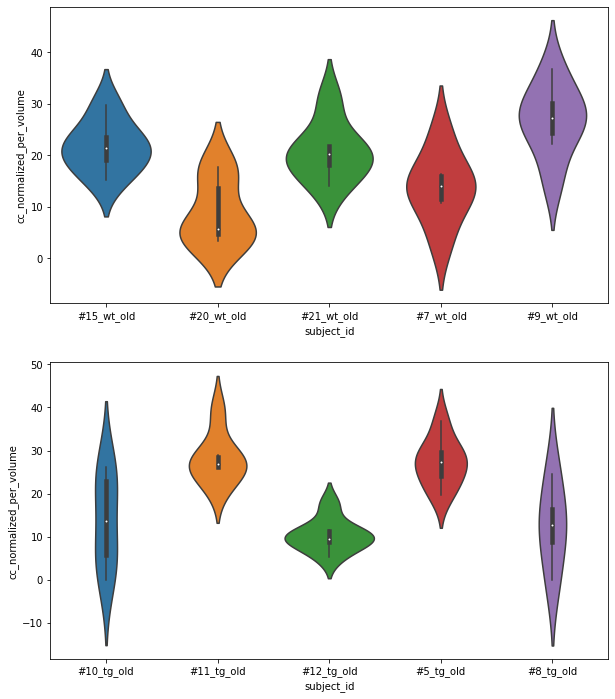

In [104]:
fig = plt.figure(figsize=(10,12), facecolor='white')
gs = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gs[0,0])
sns.violinplot(data = df[df['group_id'] == 'wt'], x='subject_id', y='cc_normalized_per_volume', ax = ax1)
ax2 = fig.add_subplot(gs[1,0])
sns.violinplot(data = df[df['group_id'] == 'tg'], x='subject_id', y='cc_normalized_per_volume', ax = ax2)

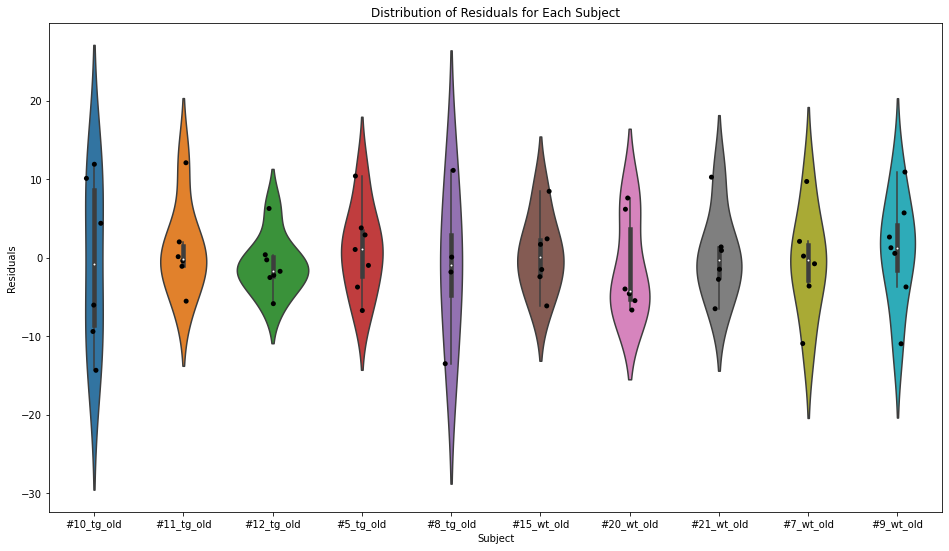

In [62]:
fig = plt.figure(figsize = (16, 9))
ax = sns.stripplot(x = model.model.groups, y = model.resid, color='k')
ax = sns.violinplot(x = model.model.groups, y = model.resid)
ax.set_title("Distribution of Residuals for Each Subject")
ax.set_ylabel("Residuals")
ax.set_xlabel("Subject")
plt.show()

# Linearity
To determine if we have linearity, the points should be symmetrically distributed around a horizontal line, with a roughly constant variance. 
Source: https://people.duke.edu/~rnau/testing.htm

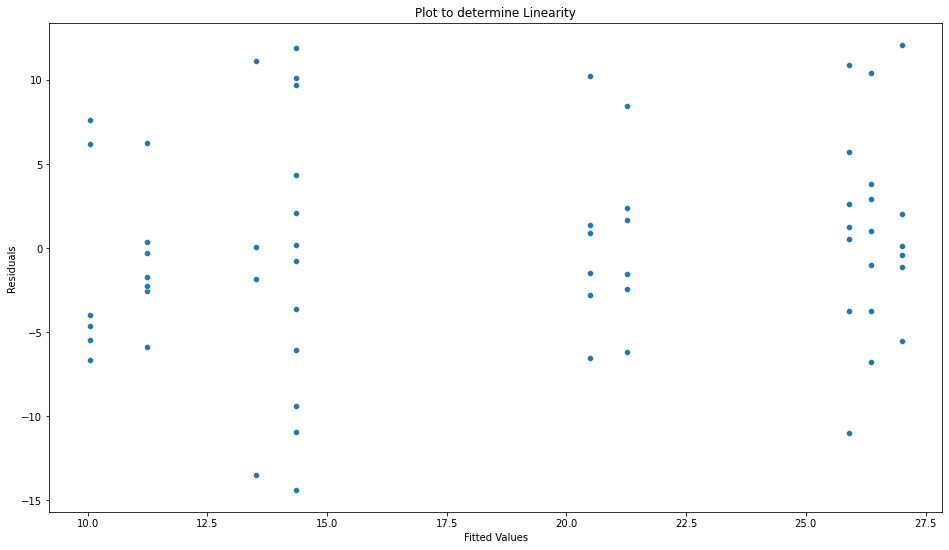

In [64]:
fig = plt.figure(figsize = (16, 9))
ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)
ax.set_title("Plot to determine Linearity")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
plt.show()

### Outlier removal

In [68]:
df['cc_normalized_per_volume']

0      0.000000
1     18.729920
2      8.306840
3      4.944721
4     24.454311
        ...    
56    36.798276
57    28.516217
58    31.592163
59    22.159508
60    27.151992
Name: cc_normalized_per_volume, Length: 61, dtype: float64

In [78]:
df_filtered

,Unnamed: 0,file_id,group_id,subject_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
0,0,0,tg,#10_tg_old,1118784.0,8.0,0.0,0.000000,0.000000
1,1,1,tg,#10_tg_old,5697120.0,8.0,64.0,149.839362,18.729920
2,2,2,tg,#10_tg_old,6422816.0,8.0,32.0,66.454716,8.306840
3,3,3,tg,#10_tg_old,5394976.0,8.0,16.0,39.557768,4.944721
4,4,4,tg,#10_tg_old,4181696.0,9.0,69.0,220.088800,24.454311
...,...,...,...,...,...,...,...,...,...
56,56,59,wt,#9_wt_old,7410528.0,9.0,184.0,331.184482,36.798276
57,57,60,wt,#9_wt_old,7109728.0,10.0,152.0,285.162170,28.516217
58,58,61,wt,#9_wt_old,5770116.0,9.0,123.0,284.329471,31.592163
59,59,62,wt,#9_wt_old,5751712.0,9.0,86.0,199.435575,22.159508


In [93]:
cutoff = 1.5*df['cc_normalized_per_volume'].std()
mean = df['cc_normalized_per_volume'].mean()
min_value, max_value = df['cc_normalized_per_volume'].min(), df['cc_normalized_per_volume'].max()

df_filtered = df[(df.cc_normalized_per_volume >= mean - cutoff) & (df.cc_normalized_per_volume <= mean + cutoff)]

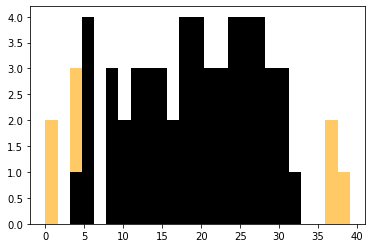

In [95]:
plt.hist(df['cc_normalized_per_volume'], bins=25, range=(min_value, max_value), alpha=0.6, color='orange')
plt.hist(df_filtered['cc_normalized_per_volume'], bins=25, range=(min_value, max_value), color='black')
plt.show()


## Get familiar with sns

In [14]:
sns.set_theme()

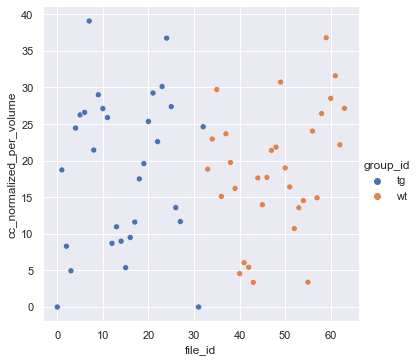

In [15]:
sns.relplot(data=df, x="file_id", y="cc_normalized_per_volume", hue="group_id")

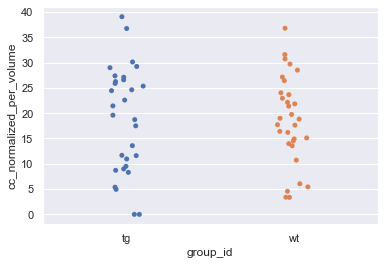

In [16]:
sns.stripplot(data=df, x='group_id', y='cc_normalized_per_volume')

Example of a regression plot

Text(0.5, 1.0, 'correlation between normalized area and volume')

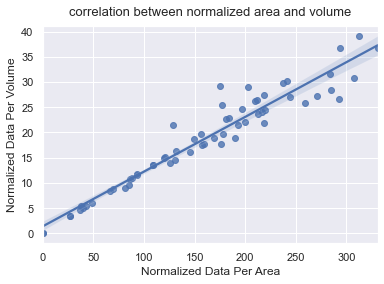

In [17]:
sns.regplot(data=df, x='cc_normalized_per_area', y='cc_normalized_per_volume')
plt.xlabel('Normalized Data Per Area', fontsize=12)
plt.ylabel('Normalized Data Per Volume', fontsize=12)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#plt.text(17, 95, 'r = 0.68\np = 0.03', fontsize=11)
plt.title('correlation between normalized area and volume', fontsize=13, pad=10)
#plt.savefig('correlation_analysis_expert_vs_findmycells.png', dpi=300)
#plt.show()